Question 5
Option A: Distributions
1. Build a derived variable representing the average speed over the course of a trip.
2. Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September?      If you decide they are not the same, can you form a hypothesis regarding why they differ?
3. Can you build up a hypothesis of average trip speed as a function of time of day?

Downloading the data from the url containing the required csv file for September 2015 Green Taxis data using "pandas.read_table" which has "tab (\t)" as default delimiter . So used "comma (,)" as the separator for csv file.

For this part, I haven't removed any erroneous data. But after the work with the original data, I have removed the data with errors and again performed the analysis.
The errors I am refering to are related to the completion of time for long trips, which I have discussed at the end.

In [14]:
#importing the pandas library for data analysis
import pandas as pd

#downloading the data from the url
data=pd.read_table("https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv",sep=',')

In [15]:
#making a copy of the data set
df=data

#checking the number of missing values in each column
print(df.isnull().sum())

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1494926
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
dtype: int64


Inference-
'Ehail_fee' column has all missing values. So we remove it using drop function.
axis=1 refers to the column axis and inplace=True means that make the change in the data set permanently.

In [16]:
#removing 'Ehail_fee' column from the data set
df.drop('Ehail_fee', axis=1, inplace=True)

#checking the columns in the data (checking whether 'Ehail_fee' is removed)
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'improvement_surcharge', 'Total_amount',
       'Payment_type', 'Trip_type '],
      dtype='object')

To calculate the average speed of the trip, we need the trip duration.
So, we create another column (Trip_duration), which is the difference between the dropoff time and the pickup time.
For this, we need to first convert the columns "lpep_pickup_datetime" and "Lpep_dropoff_datetime" to datetime type.

In [17]:
#"lpep_pickup_datetime" and "Lpep_dropoff_datetime" have indexes 1 and 2 respectively
df.iloc[:,1:3] = df.iloc[:,1:3].apply(pd.to_datetime, errors='coerce')
#Passing errors='coerce' to convert invalid data to NaT (not a time)

#Creating the "Trip_duration" column
df['Trip_duration']=df['Lpep_dropoff_datetime']-df['lpep_pickup_datetime']

Since the Trip_duration column contains both the date and time, we look at the components of the time portion (hour, minutes, seconds, etc.).

In [18]:
#Looking at the components of the time (of the trip duration)
df['Trip_duration'].dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,0,0,0,4,0,0,0
1,0,0,0,4,0,0,0
2,0,0,2,34,0,0,0
3,0,0,4,6,0,0,0
4,0,0,4,6,0,0,0
5,0,0,4,41,0,0,0
6,0,0,4,58,0,0,0
7,0,0,3,19,0,0,0
8,0,0,4,44,0,0,0
9,0,0,5,10,0,0,0


Now, since we want to calculate the duration only, we calculate the duration as the total seconds.

In [19]:
#Converting the duration equal to total seconds
df['Trip_duration']=df['Trip_duration'].astype('timedelta64[s]')

Subsetting the data set with only those values of Trip duration which are greater than 0. This is necessary, otherwise it will result in infinite value of average speed

In [20]:
#Removing observations with duration=0
df=df[df.Trip_duration >0]

Since, Speed=Distance/Time, here. Average Speed= Trip Distance/Trip Duration
The units of Avg_speed are Miles/second (in this case).
To convert to miles/hour, we multiply it by 3600 (1 hour = 3600 seconds).

In [21]:
#Creating the average speed variable
df['Avg_speed']= (df['Trip_distance'] / df['Trip_duration']) #miles/second

df['Avg_speed']=df['Avg_speed']*3600  #miles/hour

#Looking at the summary statistics of the Average speed
df['Avg_speed'].describe()

C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    1.493846e+06
mean     1.579184e+01
std      2.158942e+02
min      0.000000e+00
25%      9.313433e+00
50%      1.176755e+01
75%      1.506488e+01
max      2.026800e+05
Name: Avg_speed, dtype: float64

As we can see that the maximum value of Average speed is 2.026800e+05, which is impossible. It is due to some error in the data which I have showed at the last.

Creating a new column "Week" which is the week ordinal of the year, considering the Dropoff time

In [22]:
#Creating a new variable "Week"
df['Week']=pd.DatetimeIndex(df['Lpep_dropoff_datetime']).week

#Converting the Week variable into categorical type
df['Week']=df.Week.astype('category')

#Looking at its summary statistics
df['Week'].describe()

C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count     1493846
unique          5
top            37
freq       363672
Name: Week, dtype: int64

To calculate the average speed per week, we need to group the data by the week number and then calculate the mean of the average speed.

In [23]:
#Grouping the data based on the week value and calculating the average speed in that week
df.groupby('Week').Avg_speed.mean()

Week
36    15.978631
37    15.356781
38    15.281045
39    16.200527
40    16.904883
Name: Avg_speed, dtype: float64

From the numbers, it is quite evident that the average trip speeds are materially the same in all weeks of September 2015.
But, it is always better to plot the same.

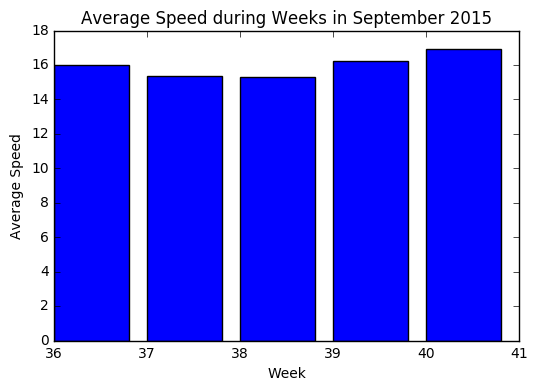

In [24]:
#importing the matplotlib library to plot the average speed across weeks in September
import matplotlib.pyplot as plt
%matplotlib inline

Week=[36,37,38,39,40]
Average_speed=[15.978631,15.356781,15.281045,16.200527,16.904883]

plt.bar(Week,Average_speed)
plt.xlabel('Week')
plt.ylabel('Average Speed')
plt.title('Average Speed during Weeks in September 2015')

Inference- The average speed across the all the weeks in September have nearly the same average speed. This is justified because there were as such no special events in any of the weeks in September 2015 in New York.

To analyse the average speed as the function of time of the day, we will first create a new variable "Hour", which is the hour extracted from the pickup time.

In [25]:
#Creating a column "Hour", which is the hour extracted from the pickup time
df['Hour']=pd.DatetimeIndex(df['lpep_pickup_datetime']).hour

C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


To calculate the average speed per hour, we need to group the data by the hour value and then calculate the mean of the average speed for that hour.

In [26]:
#Grouping the data based on the hour value and calculating the average speed in that hour
df.groupby('Hour').Avg_speed.mean()

Hour
0     17.627781
1     17.920955
2     18.491873
3     19.044242
4     19.513797
5     29.091177
6     20.837229
7     15.794756
8     15.512551
9     14.840761
10    15.319964
11    16.063268
12    15.568542
13    15.499389
14    13.319543
15    13.861156
16    13.673805
17    15.639893
18    13.743963
19    14.008072
20    14.601560
21    16.043777
22    16.404644
23    17.340058
Name: Avg_speed, dtype: float64

Plotting the line graph to show the average speed as a function of the time of the day.

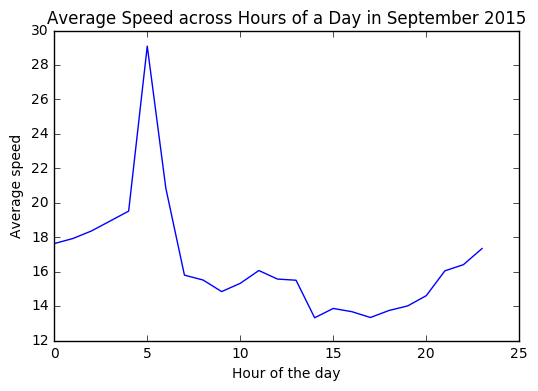

In [28]:
import numpy as np

Average_speed=[17.627177,17.920955,18.360816,18.934826,19.513797,29.091177,20.836070,15.794756,15.512551,14.840761\
               ,15.319245,16.062522,15.568066,15.499282,13.319543,13.861153,13.673630,13.335646,13.743497,14.007720\
               ,14.601226,16.043176,16.404302,17.340058]
Hour=np.arange(0,24)

plt.plot(Hour,Average_speed)
plt.xlabel('Hour of the day')
plt.ylabel('Average speed')
plt.title('Average Speed across Hours of a Day in September 2015')

Inference- We can see that there is a downward trend in the average speed from midnight till 8PM and then it starts to increase again. This is justified because, generally after 9PM, roads are less busy as compared to the other day time hours. So, on less busy roads, the average speed is more.
Also, the average speed is comparitively less from 2PM to 6PM, which is generally the time for highest traffic in any city.
The unsual spike at 5AM and also the maximum value of Average speed (max=2.026800e+05) is due to the erroneous data which I will show now.

To analyze the errors, I created another column (Trip_duration), which is the difference between the dropoff time and the pickup time.
For this, we need to first convert the columns "lpep_pickup_datetime" and "Lpep_dropoff_datetime" to datetime type and then create the new column.

In [29]:
df.iloc[:,1:3] = df.iloc[:,1:3].apply(pd.to_datetime, errors='coerce') 
#Passing errors='coerce' to convert invalid data to NaT (not a time)

#Creating the "Trip_duration" column
df['Trip_duration']=df['Lpep_dropoff_datetime']-df['lpep_pickup_datetime']

C:\Users\sethi\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\sethi\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


My hypothesis is that we should first check the trip duration for the trips with very large trip distance.

If we look at the observations with trip distance greater than 100 miles, we find that some of the records are erroneous.
So, these observations have non-natural (artificial outliers).
The outliers lead to decrease in normality of the distribution,so it is better to remove them.

In [32]:
#subsetting data with trip distance greater than 100 miles
df1=df[df.Trip_distance>=100]

#selecting only Trip_distance and Trip_duration columns
df1.loc[:,['Trip_distance','Trip_duration']]

,Trip_distance,Trip_duration,lpep_pickup_datetime
478080,246.28,03:37:07,2015-09-10 21:15:00
516757,120.13,03:16:58,2015-09-11 17:22:50
885097,100.74,02:14:37,2015-09-18 20:21:27
944537,134.70,02:16:54,2015-09-19 18:49:29
1077032,105.65,01:58:06,2015-09-22 10:30:53
1282594,108.62,06:36:08,2015-09-26 17:23:52
1321961,603.10,00:10:24,2015-09-27 03:13:48
1416994,112.60,06:09:31,2015-09-29 10:45:52
1432692,112.60,00:00:02,2015-09-29 17:01:17


We can see the following anomalies:
1. (1321961) the trip of 603.10 miles was completed in 10 minutes 24 seconds, which is not possible.
2. (1432692) the trip of 112.60 miles was completed in mere 2 seconds, which is not at all possible.

Similarly, we can find more anomalies if we further drill down the data.

Now, I will again calculate the average speed statistics, after subsetting the data by removing trips with Trip distance > 100.

In [42]:
#Removing trips with trip distance greater than 100 miles
df2=df[df.Trip_distance < 100]

#Looking at the summary statistics of the Average speed
df2['Avg_speed'].describe()

count    1.493837e+06
mean     1.565373e+01
std      1.382306e+02
min      0.000000e+00
25%      9.313433e+00
50%      1.176755e+01
75%      1.506475e+01
max      4.572000e+04
Name: Avg_speed, dtype: float64

In [48]:
#Removing trips with trip distance greater than 100 miles
df2=df[df.Trip_distance < 100]

#Looking at the summary statistics of the Average speed
df2['Avg_speed'].describe()

count    1.493837e+06
mean     1.565373e+01
std      1.382306e+02
min      0.000000e+00
25%      9.313433e+00
50%      1.176755e+01
75%      1.506475e+01
max      4.572000e+04
Name: Avg_speed, dtype: float64

Inference-The maximum value of the Average speed decrease by 1 power of 10, but still it is very large. This can be attributed to the fact that there are more anomalies in the data, which I could have found out if there was more time.